In [1]:
%matplotlib inline

# Process a high-resolution image

This example shows how to use `squidpy.im.process` with tiling.

The function can be applied to any method (e.g., smoothing, conversion
to grayscale) or `layer` of a high-resolution image layer of
`squidpy.im.ImageContainer`.

By default, `squidpy.im.process` processes the entire input image at
once. In the case of high-resolution tissue slides however, the images
might be too big to fit in memory and cannot be processed at once. In
that case you can use the argument `chunks` to tile the image in crops
of shape `chunks`, process each crop, and re-assemble the resulting
image. Note that you can also use `squidpy.im.segment` in this manner.

Note that depending on the processing function used, there might be
border effects occurring at the edges of the crops. Since Squidpy is
backed by `dask`, and internally chunking is done using
`dask.array.map_overlap`, dealing with these border effects is easy.
Just specify the `depth` and `boundary` arguments in the `apply_kwargs`
upon the call to `squidpy.im.process`. For more information, please
refer to the documentation of `dask.array.map_overlap`.

For the build in processing functions, [gray]{.title-ref} and
[smooth]{.title-ref}, the border effects are already automatically taken
care of, so it is not necessary to specify `depth` and `boundary`. For
`squidpy.im.segment`, the default `depth` is 30, which already takes
care of most severe border effects.

::: seealso
-   `sphx_glr_auto_examples_image_compute_smooth.py`.
-   `sphx_glr_auto_examples_image_compute_gray.py`.
-   `sphx_glr_auto_examples_image_compute_segment_fluo.py`.
:::


In [2]:
import squidpy as sq

from scipy.ndimage import gaussian_filter
import numpy as np

import matplotlib.pyplot as plt

> IDF: adopted script to include a version of the image processed without being chunked

# Built-in processing functions


In [3]:
# load the H&E stained tissue image
img = sq.datasets.visium_hne_image()

In [4]:
img

ImageContainer[shape=(11757, 11291), layers=['image']]

We will process the image by tiling it in crops of shape
`chunks = (1000, 1000)`.


In [5]:
sq.im.process(img, layer="image", method="gray", chunks=1000)

In [15]:
img

ImageContainer[shape=(20, 20), layers=['image', 'smooth_depth0', 'smooth_depth1']]

In [8]:
sq.im.process(img, layer="image", method="gray")

In [6]:
img

ImageContainer[shape=(11757, 11291), layers=['image', 'image_gray']]

In [7]:
sq.im.process(img, layer="image", method="gray", layer_added='image_gray_unchunked')

In [8]:
img

ImageContainer[shape=(11757, 11291), layers=['image', 'image_gray', 'image_gray_unchunked']]

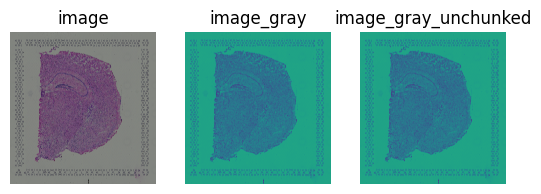

In [9]:
fig, ax = plt.subplots(1, 3)
img.show(layer='image', ax=ax[0], figsize=2)
img.show(layer='image_gray', ax=ax[1], figsize=2)
img.show(layer='image_gray_unchunked', ax=ax[2], figsize=2)

Now we can look at the result on a cropped part of the image.


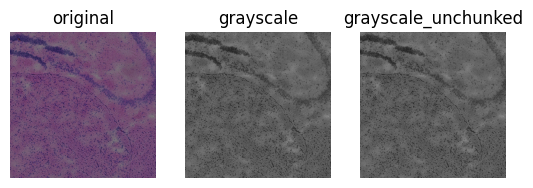

In [12]:
crop = img.crop_corner(4000, 4000, size=2000)
fig, axes = plt.subplots(1, 3)
crop.show("image", ax=axes[0])
_ = axes[0].set_title("original")
crop.show("image_gray", cmap="gray", ax=axes[1])
_ = axes[1].set_title("grayscale")
crop.show("image_gray_unchunked", cmap="gray", ax=axes[2])
_ = axes[2].set_title("grayscale_unchunked")

# Custom processing functions

Here, we use a custom processing function (here
`scipy.ndimage.gaussian_filter`) with chunking to showcase the `depth`
and `boundary` arguments.

Lets use a simple image and choose the chunk size in such a way to
clearly see the differences between using overlapping crops and
non-overlapping crops.


In [14]:
arr = np.zeros((20, 20))
arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [17]:
arr[10:] = 1
arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.

In [22]:
img = sq.im.ImageContainer(arr, layer="image")

# smooth the image using `depth` 0 and 1
sq.im.process(
    img,
    layer="image",
    method=gaussian_filter,
    layer_added="smooth_depth0",
    chunks=10,
    sigma=1,
    apply_kwargs={"depth": 0},
)
sq.im.process(
    img,
    layer="image",
    method=gaussian_filter,
    layer_added="smooth_depth1",
    chunks=10,
    sigma=1,
    apply_kwargs={"depth": 1, "boundary": "reflect"},
)
sq.im.process(
    img,
    layer='image',
    method=gaussian_filter,
    layer_added='smooth_unchunked',
    sigma=1
)
    

Plot the difference in results. Using overlapping blocks with
`depth = 1` removes the artifacts at the borders between chunks.


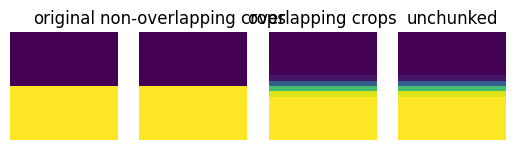

In [23]:
fig, axes = plt.subplots(1, 4)
img.show("image", ax=axes[0])
_ = axes[0].set_title("original")
img.show("smooth_depth0", ax=axes[1])
_ = axes[1].set_title("non-overlapping crops")
img.show("smooth_depth1", ax=axes[2])
_ = axes[2].set_title("overlapping crops")
img.show('smooth_unchunked', ax=axes[3])
_ = axes[3].set_title('unchunked')

> IDF: Chunking and processing with overlapping blocks seems like an effective approach to handling large files. However, if the size is small enough, directly not chunking saves code and is conceptually simpler.